# Importing libraries

In [2]:
import sys
sys.dont_write_bytecode = True
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import Regreesion

# About Data

The data used in this project is sourced from Kaggle's **Gym Members Exercise Dataset**.  
This dataset is published under the [Apache License 2.0](https://www.apache.org/licenses/LICENSE-2.0).

## Dataset Overview:
This dataset provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics. It contains **973 samples** of gym data, including key performance indicators such as heart rate, calories burned, and workout duration. Each entry also includes demographic data and experience levels, enabling comprehensive analysis of fitness patterns, athlete progression, and health trends.

### Dataset Description Source:
The dataset description is provided by the dataset's author, and all information about its features, sources, and structure is based on the details shared by the author on Kaggle.


## Key Features:
- **Age**: Age of the gym member.
- **Gender**: Gender of the gym member (Male or Female).
- **Weight (kg)**: Member’s weight in kilograms.
- **Height (m)**: Member’s height in meters.
- **Max_BPM**: Maximum heart rate (beats per minute) during workout sessions.
- **Avg_BPM**: Average heart rate during workout sessions.
- **Resting_BPM**: Resting heart rate before workout.
- **Session_Duration (hours)**: Duration of each workout session in hours.
- **Calories_Burned**: Total calories burned during each session.
- **Workout_Type**: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
- **Fat_Percentage**: Body fat percentage of the member.
- **Water_Intake (liters)**: Daily water intake during workouts.
- **Workout_Frequency (days/week)**: Number of workout sessions per week.
- **Experience_Level**: Level of experience, from beginner (1) to expert (3).
- **BMI**: Body Mass Index, calculated from height and weight.

## Sources
The dataset was generated using simulated data based on realistic gym exercise patterns, informed by:
- Publicly available fitness studies
- Industry reports on exercise and health trends
- Surveys related to workout habits, heart rate data, and calorie expenditure

# Loading Data from CSV File

In [3]:
# Load the data
data = pd.read_csv('gym_members_exercise_tracking.csv')

# Displaying the data in HTML format
html_table = data.head(5).to_html(index=False, escape=False)

# Printing the table in a markdown cell
display(HTML(html_table))

Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


# Data Cleaning and Enhancement

In this section, we perform two main tasks to enhance the dataset:

1. **Adding a New Column 'calories_spent_per_hour'**  
   We calculate the calories burned per hour of workout by dividing the total calories burned by the session duration in hours. This helps us understand the workout intensity based on the calories burned over time.

2. **Data Cleaning**  
   - **Removing Rows with Missing Data**: We remove any rows with missing values to ensure the integrity of the dataset for analysis.
   - **Removing Outliers**: We filter out extreme values by removing individuals with a BMI below 15 or above 50, as such values are unrealistic and could skew the analysis.

After these modifications, the dataset is cleaner and more suitable for analysis.


In [4]:
# 1. Adding a new column 'Calories_spent_per_hour'
# Calculating calories burned per hour of workout
data['Calories_spent_per_hour'] = data['Calories_Burned'] / data['Session_Duration (hours)']

# 2. Data cleaning
# - Removing rows with missing data
data_cleaned = data.dropna()

# - Removing outliers, e.g. removing people with BMI below 15 or above 50
data_cleaned = data_cleaned[(data_cleaned['BMI'] >= 15) & (data_cleaned['BMI'] <= 40)]

# Displaying the data in HTML format
html_table = data_cleaned.head(5).to_html(index=False, escape=False)

# Printing the table in a markdown cell
display(HTML(html_table))

Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calories_spent_per_hour
56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,776.923077
46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,679.230769
32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,609.909910
25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,901.694915
56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55,701.886792


# The Impact of Workout Frequency on CalorieS Burn
Our goal is to determine the optimal number of training days per week for maximizing calorie burn. To begin, we'll analyze box plots representing calorie expenditure across different workout frequencies in the data. This will allow us to visually assess the relationship between training days per week and calories burned.

In [21]:
# Renaming for more clarity
data = data_cleaned

# Get sorted unique workout frequencies
frequency = np.sort(data['Workout_Frequency (days/week)'].unique())

# Prepare the data for the box plot by grouping 'Calories_Burned' for each workout frequency
boxplot_data = [data[data['Workout_Frequency (days/week)'] == freq]['Calories_Burned'] for freq in frequency]

# Creating a DataFrame to store the summary information
summary_data = {
    'Days/Week': frequency,
    'Sample Size': [len(boxplot_data[i]) for i in range(len(frequency))],
    'Mean': [np.mean(boxplot_data[i]) for i in range(len(frequency))],
    'Standard Deviation': [np.std(boxplot_data[i]) for i in range(len(frequency))],
    'Median': [np.median(boxplot_data[i]) for i in range(len(frequency))]
}

summary_df = pd.DataFrame(summary_data)

# Displaying the data in HTML format
html_table = summary_df.to_html(index=False, escape=False)
display(HTML(html_table))

Days/Week,Sample Size,Mean,Standard Deviation,Median
2,184,730.869565,235.554951,723.5
3,324,816.027778,206.574059,832.0
4,291,999.800687,233.335860,962.0
5,102,1277.568627,181.719376,1271.5


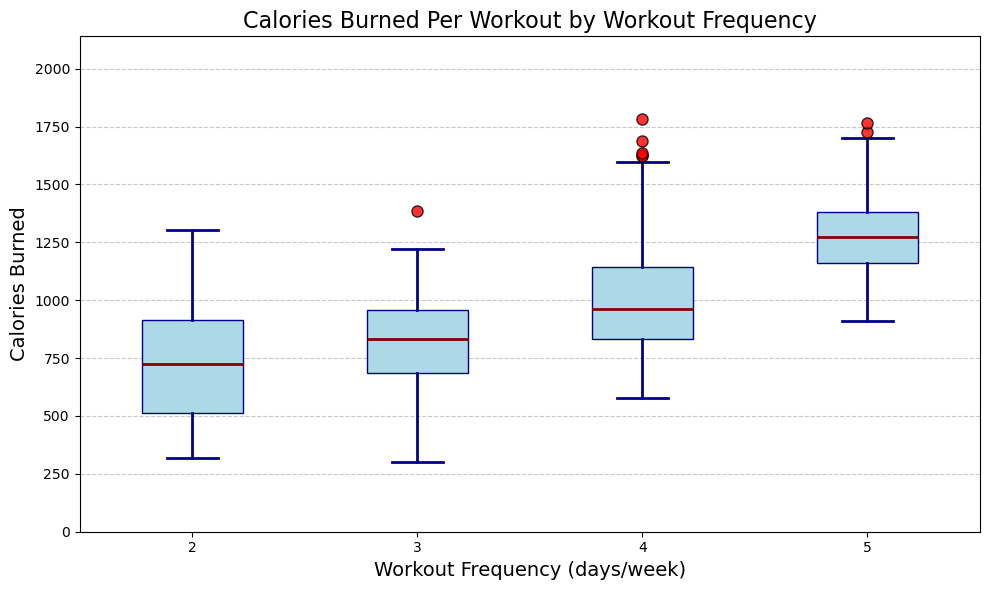

In [6]:
# Create a single box plot with enhanced styling
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, 
            labels=frequency,
            patch_artist=True,  # Fill the boxes with color
            boxprops=dict(facecolor='lightblue', color='darkblue'),  # Box color
            whiskerprops=dict(color='darkblue', linewidth=2),  # Whisker color and thickness
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8, alpha=0.8),  # Outlier properties
            capprops=dict(color='darkblue', linewidth=2),  # Cap color and thickness
            medianprops=dict(color='darkred', linewidth=2))  # Median line color and thickness

# Add labels and title with larger fonts for better visibility
plt.xlabel('Workout Frequency (days/week)', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)
plt.title('Calories Burned Per Workout by Workout Frequency', fontsize=16)

# Adjust y-axis limits and grid for better presentation
y_max = data['Calories_Burned'].max()
plt.ylim(0, y_max + y_max / 5)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot with tight layout
plt.tight_layout()
plt.show()

Apologies for the oversight! Here's the corrected analysis, now including the mean values:

#### 2 Days per Week (184 samples)
- This group shows the **highest variability** in calorie burn, indicating diverse approaches to workouts among participants.
- The **mean** is 730.87 kcal, and the **median** is approximately 723.5 kcal. The **standard deviation** is 235.55 kcal, reflecting a wide range of values.
- The **absence of outliers** suggests that most participants fall within the expected range.

#### 3 Days per Week (324 samples)
This group shows less variability than the 2-day group. The mean calorie burn is 816.03 kcal, and the median is around 832 kcal. The standard deviation is 206.57 kcal, with one outlier indicating a participant with an unusually high calorie burn.

#### 4 Days per Week (291 samples)
The 4-day group shows moderate variability, with a mean calorie burn of 999.80 kcal and a median of around 962 kcal. The standard deviation is 233.34 kcal. The longer upper whisker suggests higher variability in the upper range of calorie burn, and three outliers point to exceptionally intense training cases.

#### 5 Days per Week (102 samples)
This group has the least variability, with a mean of 1277.57 kcal and a median of 1271.5 kcal. The standard deviation is 181.72 kcal, indicating a more concentrated distribution around the mean. Three outliers suggest the presence of individuals with significantly higher calorie burn, possibly due to very intense training sessions.

These findings suggest that as the number of training days increases, both the mean and variability in calorie burn tend to rise, likely due to more intense training programs. However, further analysis would be needed to better understand factors such as workout intensity, which could play a key role in these results.



